In [1]:
import numpy as np
import matplotlib.pyplot as plt

Question 1

In [2]:

n = 26e6

searches = [1.0e3, 1.0e4, 1.0e5]
for m in searches:

    Linear_search_time = m * 1.0e-8 * n
    Binary_search_time = m * 1.0e-6 * np.log(n) + 2.0e-5 * n * np.log(n)

    print("Number of searches =", m)
    print("Linear search time: ", Linear_search_time)
    print("Binary search time: ", Binary_search_time)


Number of searches = 1000.0
Linear search time:  260.0
Binary search time:  8878.29276351969
Number of searches = 10000.0
Linear search time:  2600.0
Binary search time:  8878.446425983555
Number of searches = 100000.0
Linear search time:  26000.0
Binary search time:  8879.983050622193


For a small number of searches, linear search is faster, however, for a larger number of searches binary search is faster.

The number of searches where binary becomes faster than linear search is when the Linear_search_time = Binary_search_time \

$ => 10^{-8} m n = 10^{-6} m \log(n) + 2\times 10^{-5}  n \log(n) $ \

$ => m ( 10^{-8} n - 10^{-6} \log(n)) = 2\times 10^{-5}  n \log(n) $ \

$ => m = \cfrac{ 2\times 10^{-5}  n \log(n) }{ 10^{-8} n - 10^{-6} \log(n) }$


In [3]:
m = (2.0e-5 * n * np.log(n)) / (1.0e-8 * n - 1.0e-6 * np.log(n))
print(m)

34149.45670891916


Question 2

Fast checks:
Check that both matrices are square and they are the same shape O(1)

Slow checks:
Check each if each item in A + B is real O(n^2)


In [4]:

def evals(A, B):
    return np.linalg.eigvals(A + B)

a = 21
b = 67

A_diagonal = np.random.rand(10)
B_diagonal = np.random.rand(10)

A = np.diag(A_diagonal)
B = np.diag(B_diagonal)

assert np.allclose(sorted(evals(A, B)), sorted(A_diagonal + B_diagonal))


Taylor series expansion for $ f(x+h) $

$ f(x+h) = f(x)+hf'(x)+\cfrac{h^2}{2!}f''(x)+\cfrac{h^3}{3!}f'''(x)$ \

$ Substituting in for one sided difference

$ \cfrac{df(x)}{dx} \approx \cfrac{f(x+h)-f(x)}{j}$ \

$ = \cfrac{f(x)+hf'(x)+\mathcal{O}(h^2) - f(x)}{h}  $ \

$ = f'(x) + \mathcal{O} (h) $

Therefor the error in the derivative is proportional to the error in the original taylor series
For symmetrical difference

$ \cfrac{df(x)}{dx} \approx \cfrac{f(x+h)-f(x-h)}{2h} $ \

$ = \cfrac{ ( f(x)+hf'(x)+\cfrac{h^2}{2!}f''(x) + \mathcal{O}(h^3)) - ( f(x)-hf'(x)+\cfrac{h^2}{2!}f''(x) + \mathcal{O}(h^3))}{2h} $ \

$ = f'(x) + \mathcal{O}(h^2) $

Error in $f'(x)$ proportional to the error in $f(x)$ squared \
For example if the error in $f(x)$ halved, the error in $f'(x)$ would quarter

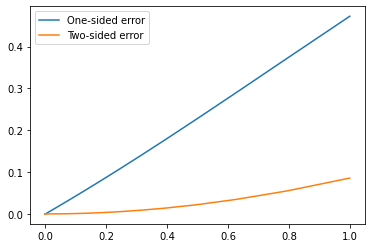

In [5]:

def one_sided_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def two_sided_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

H = np.logspace(-10, 0, num=100)
x = 1.0

f = lambda y: np.sin(y)

one_sided_errors = []
two_sided_errors = []

for h in H:

    one_sided_error = abs(one_sided_difference(f, x, h) - np.cos(x))
    one_sided_errors.append(one_sided_error)
    two_sided_error = abs(two_sided_difference(f, x, h) - np.cos(x))
    two_sided_errors.append(two_sided_error)

    #print("h =", h)
    #print("One-sided error: ", one_sided_error)
    #print("Two-sided error: ", two_sided_error)

plt.plot(H, one_sided_errors, label="One-sided error")
plt.plot(H, two_sided_errors, label="Two-sided error")
plt.legend()



Question 4

dy/dx = 2*x**3*cos(x**2) + 2*x*sin(x**2)
h = 1e-09 x = 10 error = 4.54747350886464e-13
h = 1e-09 x = 100 error = 1.23400241136551e-8
h = 1e-09 x = 1000 error = 0.00124907493591309
h = 1e-09 x = 1000 error = 0.00124907493591309
h = 1e-09 x = 10000 error = 48.4514160156250
h = 1e-12 x = 10 error = 0
h = 1e-12 x = 100 error = 2.32830643653870e-10
h = 1e-12 x = 1000 error = 2.38418579101563e-7
h = 1e-12 x = 1000 error = 2.38418579101563e-7
h = 1e-12 x = 10000 error = 0
h = 1e-15 x = 10 error = 0
h = 1e-15 x = 100 error = 0
h = 1e-15 x = 1000 error = 2.38418579101563e-7
h = 1e-15 x = 1000 error = 2.38418579101563e-7
h = 1e-15 x = 10000 error = 0.000122070312500000


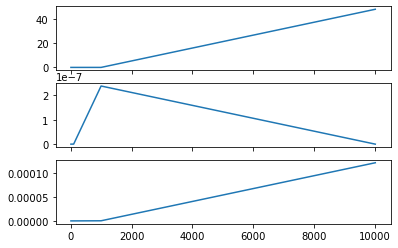

In [6]:
import sympy

x = sympy.Symbol('x')
y = x**2 * sympy.sin(x**2)
yprime = y.diff(x)
print("dy/dx =",yprime)

f = lambda y: y**2 * np.sin(y**2)
def complex_step_method(f, x, h):
    return np.imag(f(x + 1.0j * h)) / h

Xinputs = [10, 100, 1000, 1000, 10000]
H = [1.0e-9, 1.0e-12, 1.0e-15]


fig, ax = plt.subplots(len(H), sharex = True)

for h in H:
    complex_step_errors = []
    for xin in Xinputs:
        complex_step_error = abs(complex_step_method(f, xin, h) - yprime.evalf(subs={x: xin}))
        complex_step_errors.append(complex_step_error)
        print("h =", h, "x =", xin, "error =", complex_step_error)
    ax[H.index(h)].plot(Xinputs, complex_step_errors, label="h = %g" % h)


Question 5

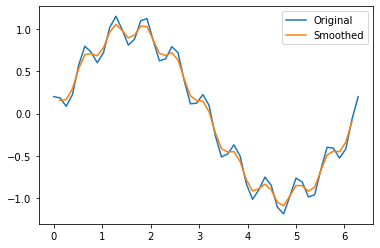

In [7]:

def three_point_moving_average(arr):
    return (arr[:-2] + arr[1:-1] + arr[2:]) / 3
    # did not specify ends to be two point

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x) + np.cos(10*x)/5

smoothed = three_point_moving_average(y)

plt.plot(x, y, label="Original")
plt.plot(x[1:-1], smoothed, label="Smoothed")
plt.legend()


250 359


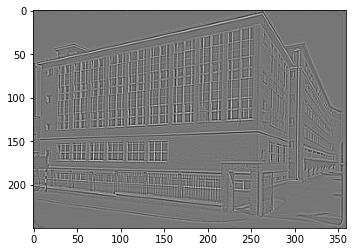

In [8]:
from PIL import Image
import scipy.signal

image = Image.open("southwing.png")

img = np.array(image)

def conv2D(img, kernal):
    w,h = img.shape
    print(w,h)
    n,_ = kernal.shape
    d = n//2
    pooled_img = np.zeros(img.shape)

    for i in range(1, w-1):
        for j in range(1, h-1):
            pooled_img[i,j] = (img[i-d:i+d+1, j-d:j+d+1] * kernal).sum()
 
    return pooled_img

kernal = np.array([ [-1,-1,-1], 
                    [-1, 8,-1], 
                    [-1,-1,-1]])

pooled_image = conv2D(img, kernal)

#pooled_image = scipy.signal.convolve2d(img, kernal, mode='same')

plt.imshow(pooled_image, cmap = "gray")
plt.show()

Complexity of image p X q in resolution with a kernal size of n would have a computational complexity of $\mathcal{O}(pqn^2)$

Question 6

C:\Users\louis\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


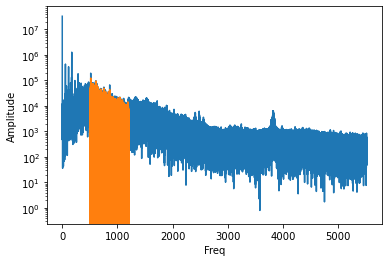

In [9]:
import scipy.io.wavfile
import urllib

from IPython.display import Audio
%matplotlib inline

url = "https://www.nasa.gov/62284main_onesmall2.wav"
# Fetch sound file
local_filename, headers = urllib.request.urlretrieve(url)

# Read frequency and data array for sound track
fs, x = scipy.io.wavfile.read(local_filename) 
# If we have a stero track (left and right channels), take just the first channel
if len(x.shape) > 1:
    x = x[:, 0]
# Time points (0 to T, with T*fs points)
t = np.linspace(0, len(x)/fs, len(x), endpoint=False)
# Perform discrete Fourier transform (real signal)
xf = np.fft.rfft(x)
# Create frequency axis for plotting
freq = np.linspace(0.0, fs/2, len(xf))
# plot frequency spectrum
plt.semilogy(freq, np.abs(xf))
# Create copy og transformed signal
xf_filtered = xf.copy()
# Cut-off frequencies (Hz)
cutoff_freq_low = 500
cutoff_freq_high = 1200
# Cut-off indices in transform array
n_cut_low = int(2*cutoff_freq_low*len(xf_filtered)/fs)
n_cut_high = int(2*cutoff_freq_high*len(xf_filtered)/fs)
# Remove low and high frequencies
xf_filtered[:n_cut_low] = 0.0
xf_filtered[n_cut_high:] = 0.0
# Perform inverse transform on filtered signal
x_filtered = np.fft.irfft(xf_filtered)
# Plot signal
plt.semilogy(freq, xf_filtered)
plt.xlabel('Freq')
plt.ylabel('Amplitude')

Audio(x_filtered, rate=fs)


Text(0, 0.5, 'time')

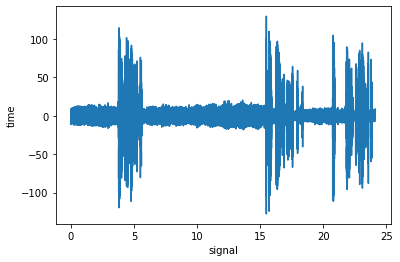

In [10]:
plt.plot(t, x_filtered)
plt.xlabel('signal')
plt.ylabel('time')

In [11]:

def df(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

def ddf(f, x, h=1e-5):
    return (df(f, x + h) - df(f, x)) / h

def optimise(f, x0, tol):
    x = x0
    X = [x]
    iterations = 0
    while (np.abs(df(f,x)/df(f,x0)) > tol).all() and iterations < 100:
        x -= df(f,x)/ddf(f,x)
        X.append(x)
        iterations += 1
    
    return X

def f(x):
    return x**2

def g(x):
    return x**3 + x**2

x = 0.5
print(optimise(g, x, 1e-6))


[0.5, 0.14999918673583573, 0.02327326796452686, 0.0007550747415556898, -4.124051457887854e-06, -4.999998209874652e-06]


In [12]:
from scipy import optimize

def dfx0(f, x, h = 1e-5):
    return (f(np.array([x[0] + h, x[1]])) - f(x)) / h

def dfx1(f, x, h = 1e-5):
    return (f(np.array([x[0], x[1] + h])) - f(x)) / h

def ddx0(f, x, h = 1e-5):
    return (dfx0(f, np.array([x[0] + h, x[1]]), h) - dfx0(f, x)) / h

def ddx1(f, x, h = 1e-5):
    return (dfx1(f, np.array([x[0], x[1] + h]), h) - dfx1(f, x, h)) / h

def ddx0x1(f, x, h = 1e-5):
    x0 = x[0]
    x1 = x[1]
    return (f(np.array([ x0 + h, x1 + h ])) - f(np.array([ x0, x1 + h ])) - f(np.array([ x0 + h, x1 ])) + f(np.array([ x0, x1 ])) ) / h**2

def g(f, x):
    return np.array([dfx0(f,x), dfx1(f,x)])

def optimise_two_variable(f, x0, tol):
    x = x0.copy()
    X = [x]
    iterations = 0
    while np.linalg.norm(g(f,x))/np.linalg.norm(g(f,x0)) > tol and iterations < 10000:

        J = np.array([[ddx0(f, x), ddx0x1(f, x)], 
                      [ddx0x1(f, x), ddx1(f, x)]])

        x -= np.matmul(np.linalg.inv(J) , g(f,x) )

        X.append(x)
        iterations += 1
    
    return x

def rosenbrock(x):
    return (2 - x[0])**2 + 100*(x[1] - x[0]**2)**2

optimal = optimise_two_variable(rosenbrock, np.array([1.1, 1.1]), 1e-9)

other_optimal = optimize.minimize(rosenbrock, np.array([1.1, 1.1]))

print(optimal)
print(other_optimal)

[1.990084   3.96042933]
      fun: 2.2227388794915457e-10
 hess_inv: array([[0.49855756, 1.99419438],
       [1.99419438, 7.98163382]])
      jac: array([ 2.20936885e-09, -6.79545309e-10])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 22
     njev: 30
   status: 0
  success: True
        x: array([1.99998509, 3.99994036])


In [13]:
import numpy as np
from scipy import optimize

a = 2
b = 100

def rosenbrock(x):
    return (a - x[0])**2 + b*( x[1] - x[0]**2)**2

def f(x):
    return (x[0]**2+x[1]**2+x[2]**2)/(x[0]*x[1]*x[2])

def df_dxi(f, x, i, h = 1e-5):
    x_plus_h = x.copy()
    x_plus_h[i] += h
    return (f(x_plus_h) - f(x)) / h

def dfn_dxi(f, x, V, h = 1e-5):
    if len(V) == 1:
        return df_dxi(f, x, V[0], h)
    else:
        x_plus_h = x.copy()
        x_plus_h[V[0]] += h
        return (dfn_dxi(f, x_plus_h, V[1:], h) - dfn_dxi(f, x, V[1:], h)) / h

def g(f, x, h = 1e-5):
    return np.array([df_dxi(f,x,i, h) for i in range(len(x))])

def J(f, x, h = 1e-5): 
    return np.array([[dfn_dxi(f, x, [i,j], h) for j in range(x.size)] for i in range(x.size)])

def optimise_n_variable(f, x0, tol = 1e-9, maxiters = 1e50, h = 1e-7):
    x = x0.copy()
    X = [x]
    iterations = 0
    while np.linalg.norm(g(f, x, h) ) / np.linalg.norm(g(f, x0, h)) > tol and iterations < maxiters:
        x -= np.linalg.solve( J(f, x, h) , g(f, x, h) )
        X.append(x)
        iterations += 1
    return x

x0 = np.array([1.1, 1.1])
optimal = optimise_n_variable(rosenbrock, x0)
other_optimal = optimize.minimize(rosenbrock, x0)


print(optimal)
print(other_optimal)

[1.99989996 3.9995998 ]
      fun: 2.2227388794915457e-10
 hess_inv: array([[0.49855756, 1.99419438],
       [1.99419438, 7.98163382]])
      jac: array([ 2.20936885e-09, -6.79545309e-10])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 22
     njev: 30
   status: 0
  success: True
        x: array([1.99998509, 3.99994036])


In [1]:

class Rosenbrock:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def f(self, x):
        return (self.a- x[0])**2 + self.b*(x[1]- x[0]**2)**2
    
    def g(self, x):
        return np.array([-2*(self.a- x[0])- 4*x[0]*self.b*(x[1]- x[0]**2), 2*self.b*(x[1]- x[0]**2)])
    
    def J(self, x):
        ddf_ddx0 = 2- 4*self.b*(x[1]- x[0]**2) + 8*self.b*x[0]**2 
        ddf_dx0dx1 =-4*self.b*x[0] 
        ddf_ddx1 = 2*self.b 
        return np.array([[ddf_ddx0, ddf_dx0dx1], [ddf_dx0dx1, ddf_ddx1]])
    
    def optimise_two_variable(self, x0, tol = 1e-9):
        x = x0.copy()
        X = [x]
        iterations = 0
        while np.linalg.norm(self.g(x))/np.linalg.norm(self.g(x0)) > tol and iterations < 10000:

            x -= np.matmul(np.linalg.inv( self.J(x) ) , self.g(x) )

            X.append(x)
            iterations += 1
        
        return x

R = Rosenbrock(2, 100)
xmin = R.optimise_two_variable(np.array([1.1, 1.1]), 1e-9)
print(xmin)


NameError: name 'np' is not defined